In [1]:
from IPython import display
#display.Image("./GridSketch.png")

In [2]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse.linalg

### 1D Update Sequence

<br>

**1 -** $\rho^k(x_{B, i}) = \sum_\alpha n_\alpha^k (x_{B, i}) q_\alpha$

<br>

**2 -** Find $\phi^k$ via the above framework $\implies \;\;\;\; \frac{d^2}{dx^2}\phi^k(x_B) = - \frac{e^2}{2 \epsilon_0 \epsilon_r} \rho^k(x_B)$ so central discretization would yield $\frac{1}{a^2} \left( \phi^k(x_{B, i+1}) - 2 \phi^k(x_{B, i}) + \phi^k(x_{B, i-1})  \right) = - \frac{e^2}{2 \epsilon_0 \epsilon_r} \rho^k(x_{B, i})$ with $\phi^k(x_{B, 0}) = 0$ 

$$ \phi^k(x_{B, i+1}) = 2 \phi^k(x_{B, i}) - \phi^k(x_{B, i-1}) - \frac{a^2 \, e^2}{2 \epsilon_0 \epsilon_r} \rho^k(x_{B, i})  $$ (needs to be solved with ghost cells on both sides at the boundaries)

<br>

**3 -** for each $\alpha$ do

&emsp;&emsp;**a )** $\mu_\alpha^k(x_{B, i}) = \bar{\mu}_\alpha(x_{B, i}) + q_\alpha \, \phi^k(x_{B, i})$

<br>

&emsp;&emsp;**b )** $v_\alpha^k(x_{B, i}) = \frac{1}{a} D_\alpha(x_{B, i})$

<br>

&emsp;&emsp;**c )** $J_{\alpha}^k(x_{A, i}) :=  v_{\alpha}^k(x_{B, i-1}) n_{\alpha}^k(x_{B, i-1}) exp \left(- \frac{\mu_{\alpha}^k(x_{B, i}) - \mu_{\alpha}^k(x_{B, i-1})}{2 k_B T} \right)
- v_{\alpha}^k(x_{B, i}) n_{\alpha}^k(x_{B, i}) exp \left(- \frac{\mu_{\alpha}^k(x_{B, i-1}) - \mu_{\alpha}^k(x_{B, i})}{2 k_B T} \right)$ with $J_\alpha ^k(x_{A, 0}) = 0$

<br>

&emsp;&emsp;**d )** $n_\alpha ^{k+1}(x_{B, i}) = n_\alpha ^{k-1}(x_{B, i}) - \frac{2 \Delta t}{a} \left( J_{\alpha} ^k(x_{A, i+1}) - J_{\alpha} ^k (x_{A, i})\right) $ with $n_\alpha ^{k+1}(x_{B, N_a}) = n_\alpha ^{0}(x_{B, N_a})$

<br>


In [3]:
lists = [1,2,3,4]
print(len(lists))
lists.insert(0, 10)
print(len(lists))
print(lists)



4
5
[10, 1, 2, 3, 4]


In [4]:
mat = [[1, 2, 3], [4, 5, 6]]
print(mat)
print(mat[0][1])
print(mat)

[[1, 2, 3], [4, 5, 6]]
2
[[1, 2, 3], [4, 5, 6]]


In [6]:
#########
# Input #
#########

species_list = ['Mg', 'e-'] # dummy list
charge_list = [2, -1]       # dummy list, same as q_alpha



species_list = ['Mg'] # dummy list
charge_list = [1]       # dummy list, same as q_alpha



eps_0 = 8.854187813e-12

eps_r = 8.854187813e-12 # might also be an input vector (1D) or matrix/tensor (2D/3D)


##################
# Initialization #
##################

Na = 9 # length of 1D "grids"

k_B = 1.38064852e-23 # m^2 kg s^-2 K^-1
k_B = 1.38064852e-23 * 1e30 # m^2 kg fs^-2 K^-1

T = 373 # in Kelvin

a = 1/(Na + 1) # the distance in between grid points, delta x

dt = 0.1 # delta t

# Create the Grids (or arrays of the x locations on the grids)
A_x = np.arange(0, Na, a)
B_x = np.arange(a/2, Na + a/2, a)

# Create n_alpha matrix where each column represents a different alpha
n_alpha_mat_Update = np.zeros([len(B_x), len(species_list)])  # n_alpha ^ (k+1) ==> update/next time-step
n_alpha_mat_Current = np.zeros([len(B_x), len(species_list)]) # n_alpha ^ k     ==> current time-step
n_alpha_mat_Past = np.zeros([len(B_x), len(species_list)])    # n_alpha ^ (k-1) ==> past time-step

# Create mu_alpha matrix where each column represents a different alpha
mu_alpha_mat = np.zeros([len(B_x), len(species_list)])

# Create mu_alpha matrix where each column represents a different alpha
mu_BAR_alpha_mat = np.zeros([len(B_x), len(species_list)]) + 100 # DUMMY VALUES

# Create v_alpha matrix where each column represents a different alpha
v_alpha_mat = np.zeros([len(B_x), len(species_list)])

# Create J_alpha matrix where each column represents a different alpha
J_alpha_mat = np.zeros([len(A_x), len(species_list)])

# Create D_alpha matrix where each column represents a different alpha
D_alpha_mat = np.zeros([len(B_x), len(species_list)]) + 0.1e15 # from fs to s (units)

# Create rho vector
rho = np.zeros(len(B_x))

# Create phi vector
phi = np.zeros(len(B_x))


print(np.shape(n_alpha_mat))

NameError: name 'n_alpha_mat' is not defined

In [7]:
n_alpha_mat_Past[46] = 95.0
n_alpha_mat_Past[45] = 100.0
n_alpha_mat_Past[44] = 95.0
n_alpha_mat_Current[46] = 95.0
n_alpha_mat_Current[45] = 100.0
n_alpha_mat_Current[44] = 95.0
n_alpha_mat_Update[45] = 0.0

print(np.transpose(n_alpha_mat_Past))
print(type(n_alpha_mat_Past[0][0]))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.  95. 100.  95.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]]
<class 'numpy.float64'>


In [8]:

print(np.transpose(n_alpha_mat_Past))
print(np.transpose(n_alpha_mat_Current))
print(np.transpose(n_alpha_mat_Update))



###############
# 1 Iteration #
###############

for i in range(len(B_x)):
    
    rho_sum = 0 # initialize the summation
    
    for alpha in range(len(species_list)):
        
        rho_sum += n_alpha_mat_Current[i][alpha] * charge_list[alpha]
    
    # Update rho vector
    rho[i] = rho_sum 
    
    
for i in range(len(B_x)):    
    
    ###################
    # Solving for Phi #  ===>  Will be replaced by the 2D & 3D frameworks later
    ###################
    
    phi = np.insert(phi, 0, 0)        # add 2 front ghost cell
    phi = np.insert(phi, 0, 0)
    phi = np.insert(phi, len(phi), 0) # add 2 back ghost cell
    phi = np.insert(phi, len(phi), 0)
    
    rho = np.insert(rho, 0, 0)
    rho = np.insert(rho, 0, 0)
    rho = np.insert(rho, len(rho), 0)
    rho = np.insert(rho, len(rho), 0)
    
    # Update phi vector
    phi[i + 2] = 2 * phi[i + 1] - phi[i] - (a**2 * np.exp(1)**2) * rho[i + 1] / (2 * eps_0 * eps_r)
    
    phi = phi[2:-2] # remove ghost cells
    rho = rho[2:-2] 
    
    
###############
# 1 Iteration #  CONTINUED
###############

# MIGHT NEED TO INVOLVE COPIES FOR INDEXING OF [i+1] and [i-1]
n_alpha_mat_Update_ = n_alpha_mat_Update # create a copy

for i in range(len(B_x)):
    
    for alpha in range(len(species_list)):
        
        # mu Update
        mu_alpha_mat[i][alpha] = mu_BAR_alpha_mat[i][alpha] + charge_list[alpha] * phi[i]
        
        # v Update
        v_alpha_mat[i][alpha] = (1/a) * D_alpha_mat[i][alpha]

        #"""
        
for i in range(len(B_x)):
    
    for alpha in range(len(species_list)):
        
        # J Update
            # if/else statements check for existence of neigbors
        if (i == 0):
            J_1 = 0.0
        else:
            J_1 = np.exp(-(mu_alpha_mat[i][alpha] + mu_alpha_mat[i-1][alpha]) / (2 * k_B * T)) * (v_alpha_mat[i-1][alpha] * n_alpha_mat[i-1][alpha] * np.exp(mu_alpha_mat[i-1][alpha] / (k_B * T))
               - v_alpha_mat[i][alpha] * n_alpha_mat[i][alpha] * np.exp(mu_alpha_mat[i][alpha] / (k_B * T))) 
                # expression for left neighbor
            
            print(mu_alpha_mat[i][alpha] + mu_alpha_mat[i-1][alpha], i)
            print(v_alpha_mat[i-1][alpha] * n_alpha_mat[i-1][alpha] * np.exp(mu_alpha_mat[i-1][alpha] / (k_B * T)))
            #print(J_2, J_1)    
            #J_3 = np.exp(-(mu_alpha_mat[i][alpha] + mu_alpha_mat[i-1][alpha]) / (2 * k_B * T))
            #J_4 = (v_alpha_mat[i-1][alpha] * n_alpha_mat[i-1][alpha] * np.exp(mu_alpha_mat[i-1][alpha] / (k_B * T))
               #- v_alpha_mat[i][alpha] * n_alpha_mat[i][alpha] * np.exp(mu_alpha_mat[i][alpha] / (k_B * T)))
            #print(J_3)
            #print(J_4)
        if (i == len(B_x) - 1):
            J_2 = 0.0
        else:
            J_2 = np.exp(-(mu_alpha_mat[i+1][alpha] + mu_alpha_mat[i][alpha]) / (2 * k_B * T)) * (v_alpha_mat[i][alpha] * n_alpha_mat[i][alpha] * np.exp(mu_alpha_mat[i][alpha] / (k_B * T))
               - v_alpha_mat[i+1][alpha] * n_alpha_mat[i+1][alpha] * np.exp(mu_alpha_mat[i+1][alpha] / (k_B * T)))
                # expression for right neighbor
            
        J_alpha_mat[i][alpha] = J_1 + J_2 # (I think its correct) or J_1 - J_2, look at the directionality
        
        #"""
        
        ###############
        # 1 Time Step #  # return current step's info from the loop for plotting etc.

        ###############
        
for i in range(len(B_x)):
    
    for alpha in range(len(species_list)):
        
            # if/else statements check for existence of index [i+1]
        if (i == len(B_x) - 1):
            n_alpha_mat_Update[i][alpha] = n_alpha_mat_Update_[-1][alpha] # implement the actual BC later
        else:
            n_alpha_mat_Update[i][alpha] = n_alpha_mat_Past[i][alpha] 
            - (2 * dt / a) * (J_alpha_mat[i+1][alpha] - J_alpha_mat[i][alpha]) 
                
# update the n_alpha's appropriately in preparation for the next iteration
n_alpha_mat_Past = n_alpha_mat_Current
n_alpha_mat_Current = n_alpha_mat_Update

print(np.transpose(n_alpha_mat_Past))
print(np.transpose(n_alpha_mat_Current))
print(np.transpose(n_alpha_mat_Update))
                
        
#print(len(B_x) == len(mu_alpha_mat[: , 1]))
        





[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.  95. 100.  95.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.  95. 100.  95.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

NameError: name 'n_alpha_mat' is not defined

<br>

<br>

More modular implementation $\implies$ update functions + iteration simulation

<br>

<br>



#### big sign error incoming!

In [9]:
a = 1/(Na + 1)

A_x = np.arange(0, 1 + 1e-15, a)
B_x = np.arange(a/2, 1 + a/2 + 1e-15, a)


In [21]:

def rho_update_1D(Na, n_alpha, q_alpha):
    """
    Input: Na (int), number of grid points
           n_alpha (float array), (Na + 1) x (alpha) where each column vector represents 
               n values for one alpha
           q_alpha (int array), each entry represents charge of a species
    Output: rho (float array), charge density array
    """
    
    print(np.shape(n_alpha))
    print(np.shape(q_alpha))
    
    for i in range(Na + 1):
    
        rho_sum = 0 # initialize the summation
    
        for alpha in range(len(q_alpha)):
            
            print(q_alpha[alpha])
        
            rho_sum += n_alpha[i][alpha] * q_alpha[alpha]
    
        # Update rho vector
        rho[i] = rho_sum
        
    return rho
    
Na = 5
n_al = np.array([[0, 1, 2, 1, 0], [0, 1, 2, 1, 0]])
ch = [0, 1]

rho_update_1D(Na, n_al, ch)


(2, 5)
(2,)
0
1
0
1
0


IndexError: index 2 is out of bounds for axis 0 with size 2

**2 -** Find $\phi^k$ via the above framework $\implies \;\;\;\; \frac{d^2}{dx^2}\phi^k(x_B) = - \frac{e^2}{2 \epsilon_0 \epsilon_r} \rho^k(x_B)$ so central discretization would yield $\frac{1}{a^2} \left( \phi^k(x_{B, i+1}) - 2 \phi^k(x_{B, i}) + \phi^k(x_{B, i-1})  \right) = - \frac{e^2}{2 \epsilon_0 \epsilon_r} \rho^k(x_{B, i})$ with $\phi^k(x_{B, 0}) = 0$ 

<br>

OR

<br>

$\frac{1}{a^2} \left( - \phi^k(x_{B, i+1}) + 2 \phi^k(x_{B, i}) - \phi^k(x_{B, i-1})  \right) = \frac{e^2}{2 \epsilon_0 \epsilon_r} \rho^k(x_{B, i})$ which can then be discretized via the definition of the tridiagonal matrix $\bf B$ (from notebook Phase II - 2D) with diagonal entries of $2$s and off-diagonal entries of $-1$s.

Then, the above becomes $\frac{1}{a^2} {\bf B} \, {\bf \phi}^k = \frac{e^2}{2 \epsilon_0 \epsilon_r} {\bf \rho}^k$ (may want to actually include the scaling of $a^{-2}$ within $\bf B$ for numerical stability ??? --> will find out)




#### Note: (nevermind)

`ghosts_included = True` works for now. The `= False` case is broken, need to fix it

In [107]:
# global variables

a = 1/(Na - 1)

A_x = np.arange(0, 1 + 1e-15, a)
B_x = np.arange(a/2, 1 + a/2 + 1e-15, a)


In [108]:
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse.linalg

def B_construct_1D(Na, ghosts_included = True):
    """
    Input: Na (int), number of grid points
           ghosts_included (bool), default is True (B is (Na-2) x (Na-2) and rho is Na-2)
                                           if False (B is (Na) x (Na) and rho is Na)
    Output: B (float array), 1D Poisson discretization matrix
    """
    # construct the tridiagonal matrix B
   
    if (ghosts_included):
        
        offsets = [-1, 0, 1] 
        diags = []
        diags.append(-np.ones(Na-3)) 
        diags.append(2 * np.ones(Na-2))
        diags.append(-np.ones(Na-3))
        B = scipy.sparse.diags(diags, offsets, format='csr') # construct a CSR version of B
        B = B.toarray() # this function will only be called once so CSR not too important
        print('The shape of B is', np.shape(B))
        print('\nB is \n', B)      
        
    else:
        
        offsets = [-1, 0, 1] 
        diags = []
        
        diags.append(-np.ones(Na-3)) 
        diags.append(2 * np.ones(Na-2))
        diags.append(-np.ones(Na-3))
        B = scipy.sparse.diags(diags, offsets, format='csr') # construct a CSR version of B
        B = B.toarray() # this function will only be called once so CSR not too important
        B = np.pad(B, [1, 1], mode='constant')
        B[0][0] = 1
        B[np.shape(B)[0]-1][np.shape(B)[0]-1] = 1
        print('The shape of B is', np.shape(B))
        print('\nB is \n', B)

    return B
    
    
def rho_update_1D(Na, n_alpha, q_alpha):
    """
    Input: Na (int), number of grid points
           n_alpha (float array), (Na + 1) x (alpha) where each column vector represents 
               n values for one alpha
           q_alpha (int array), each entry represents charge of a species
    Output: rho (float array), charge density array
    """
    
    # TREATING n_alpha as an Na x alpha matrix and q_alpha as an alpha x 1 column vector
    # ==> rho = n_alpha @ q_alpha is then the Na x 1 charge density column vector
    rho = n_alpha @ q_alpha
 
    return rho
   
    
def phi_update_1D(Na, B_matrix, rho, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1): 
    # epsilon_0 and epsilon_r expected to be global variables with possibility of epsilon_r(x) vector 
    """
    Input: Na (int), number of grid points
           B_matrix (float array), 1D Poisson discretization matrix
           rho (float array), (Na + 1) x 1 vector
           ghosts_included = True default
           epsilon_0 & epsilon_r (float) constants
    Output: phi (float array), charge density array
    """
    
    if (ghosts_included):
        
        rho_vec = rho[1:-1] # remove boundaries/ghosts
        phi_soln = scipy.sparse.linalg.cg(B_matrix, rho_vec)[0]
        phi = np.insert(phi_soln, 0, 0)   # add left boundary/ghost
        phi = np.insert(phi, len(phi), 0) # add right boundary/ghost
        
    else:
        
        #rho = np.insert(rho, 0, 0)
        #rho = np.insert(rho, len(rho), 0)
        #print(len(rho))
        
        phi = scipy.sparse.linalg.cg(B_matrix, rho)[0]
        
        #rho = rho[1:-1]
        #phi = phi[1:-1]
        
    La = 1
    X = np.linspace(0, La, Na)

    plt.plot(X, phi)
      
    return phi
                                                            

    
#########
# TESTS #
#########
    
    
Ne = 10
n_al = np.transpose([[0, 1, 2, 1, 0], [0, 1, 2, 1, 0]])
ch = [-1, 3]


Bmatrix = B_construct_1D(Ne)

Bma = B_construct_1D(Ne, False) 

phiphi = a**2 * np.ones(Ne)

#phiphi = [-1, 0, 1, 0, -1, 0, 1, 0, -1, 0]
#phiphi = [-1, 0, 1, 0, -1, 0, 1, 0, -1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0]

#phiphi = [-1, 2, 8, 4, 10, -5, 3, 6, 91, 10]

abc = phi_update_1D(Ne, Bmatrix, phiphi)

bcd = phi_update_1D(Ne, Bma, phiphi, False)

#rho_update_1D(Ne, (n_al), ch)

print('The difference is:', abc - bcd)
print(abc)
print(bcd)

The shape of B is (8, 8)

B is 
 [[ 2. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.]]
The shape of B is (10, 10)

B is 
 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
The difference is: [-0.0625  0.      0.      0.      0.      0.      0.      0.      0.
 -0.0625]
[0.     0.25   0.4375 0.5625 0.625  0.625  0.5625 0.4375 0.25   0.    ]
[0.0625 0.25   0.4375 0.5625 0.625  0.625  0.5625 

## Note:

Since the updates for $\mu_\alpha$ and $v_\alpha$ rely on values which are independent from each other, a combined function utilizing 1 instead of 2 separate for loops would be better. 

<br>

COMBINE `mu_alpha_update_1D` and `v_alpha_update_1D` into one function and return both values, then call as

`mu_alpha, v_alpha = mu_and_v_alpha_update_1D(Na, mu_bar_alpha, q_alpha, phi, D_alpha)`

In [199]:
def mu_alpha_update_1D(Na, mu_bar_alpha, q_alpha, phi):
    """
    Input: Na (int), number of grid points
           mu_bar_alpha (float array), (Na + 1) x (alpha) where each column vector represents 
               mu values for one alpha
           q_alpha (int array), each entry represents charge of a species
           phi (float array)
    Output: mu_alpha (float array), mobility array
    """
    # each mu column vector, mu_1, is given by mu_bar_1 + q_alpha_1 * phi, hence:
    
    # initialize J_alpha
    mu_alpha = np.zeros((np.shape(mu_bar_alpha)[0], np.shape(mu_bar_alpha)[1]))
    
    for i in range(len(q_alpha)): # loop over column vectors
        
        mu_alpha[:,i] = mu_bar_alpha[:,0] + q_alpha[i] * phi
          
    return mu_alpha


def v_alpha_update_1D(Na, D_alpha):
    """
    Input: Na (int), number of grid points
           D_alpha (float array), (Na + 1) x (alpha) where each column vector represents 
               D values for one alpha
           q_alpha (int array), each entry represents charge of a species
           phi (float array)
    Output: mu_alpha (float array), mobility array
    """
    
    a = 1/(Na - 1) # calculate dx
    
    # initialize J_alpha
    v_alpha = np.zeros((np.shape(D_alpha)[0], np.shape(D_alpha)[1]))
    
    for i in range(np.shape(D_alpha)[1]): # loop over column vectors
        
        v_alpha[:,i] = (1/a) * D_alpha[:,i]    
    
    return v_alpha


def J_alpha_update_1D(Na, T, mu_alpha, v_alpha, n_alpha):
    """
    Input: Na (int), number of grid points
           T (float), temperature
           mu_alpha (float array), (Na + 1) x (alpha) 
           v_alpha (float array), (Na + 1) x (alpha) 
           n_alpha (float array), (Na + 1) x (alpha) 
    Output: J_alpha (float array), particle current array
    """
    # Boltzmann's constant, ADD SOMETHING to handle different units
    k_B = 1e-2
    
    # initialize J_alpha
    J_alpha = np.zeros((np.shape(mu_alpha)[0], np.shape(mu_alpha)[1]))
    
    for i in range(np.shape(mu_alpha)[0]):
        
        for alpha in range(np.shape(mu_alpha)[1]):
            
            # if/else statements check for existence of neigbors
            if (i == 0):
                J_1 = 0.0
            else:
                J_1 = np.exp(-(mu_alpha[i][alpha] + mu_alpha[i-1][alpha]) / (2 * k_B * T)) * (v_alpha[i-1][alpha] * n_alpha[i-1][alpha] * np.exp(mu_alpha[i-1][alpha]/(k_B * T)) 
                                                                                              - v_alpha[i][alpha] * n_alpha[i][alpha] * np.exp(mu_alpha[i][alpha]/(k_B * T))) 
                # expression for left neighbor
            
            if (i == np.shape(mu_alpha)[0] - 1):
                J_2 = 0.0
            else:
                J_2 = np.exp(-(mu_alpha[i+1][alpha] + mu_alpha[i][alpha]) / (2 * k_B * T)) * (v_alpha[i][alpha] * n_alpha[i][alpha] * np.exp(mu_alpha[i][alpha]/(k_B * T)) 
                                                                                              - v_alpha[i+1][alpha] * n_alpha[i+1][alpha] * np.exp(mu_alpha[i+1][alpha]/(k_B * T)))
                # expression for right neighbor
        
            # update J_alpha
            J_alpha[i][alpha] = J_1 + J_2 # (I think its correct) or J_1 - J_2, look at the directionality
            
            # J_alpha(0) = 0, boundary condition
            if (i == 0): # can also do J_alpha[0, :] = 0
                J_alpha[i][alpha] = 0
    
    return J_alpha




## Note:

Do both `J_1` AND `J_2` become $0$ at the boundaries ???

<br>

$J_\alpha(0) = 0$, so is $J_\alpha(N_a) = 0$ ??? 

In [200]:
Ne = 5
mu_al = np.array([[1, 0], [2, 1], [3, 2], [4, 3], [5, 3]])
v_al = np.array([[1, 0], [2, 1], [3, 2], [4, 3], [5, 3]])
D_al = np.array([[1, 0], [2, 1], [3, 2], [4, 3], [5, 3]])

T = 300

Jal = J_alpha_update_1D(Ne, T, mu_al, v_al, n_al)

print(mu_al)
print(Jal)

[[1 0]
 [2 1]
 [3 2]
 [4 3]
 [5 3]]
[[ 0.          0.        ]
 [-7.75791985 -5.06032034]
 [-5.04175033 -4.03711427]
 [ 3.7393756   2.84184566]
 [ 3.3859269   3.        ]]


In [205]:
def n_alpha_update_1D(dt, Na, n_alpha_Update, n_alpha_Current, n_alpha_Past, J_alpha):
    """
    Input: dt (float), time-step size
           Na (int), number of grid points
           n_alpha_Update (float array), (Na + 1) x (alpha) 
           n_alpha_Current (float array), (Na + 1) x (alpha)  
           n_alpha_Past (float array), (Na + 1) x (alpha) 
           J_alpha (float array), (Na + 1) x (alpha) 
    Output: n_alpha_Update (float array), (Na + 1) x (alpha) 
            n_alpha_Current (float array), (Na + 1) x (alpha)  
            n_alpha_Past (float array), (Na + 1) x (alpha) 
    """
    
    a = 1/(Na - 1) # calculate dx
    B_x = np.arange(a/2, 1 + a/2 + 1e-15, a) # create B_x
    
    # initialize n_alpha_Update
    n_alpha_Update = np.zeros((np.shape(J_alpha)[0], np.shape(J_alpha)[1]))
    
    for i in range(np.shape(J_alpha)[0]):
        
        for alpha in range(np.shape(J_alpha)[1]):
            
            # if/else statements check for existence of index [i+1]
            if (i >= len(B_x) - 1):
                
                n_alpha_Update[i][alpha] = n_alpha_Past[i][alpha] - (2 * dt / a) * (- J_alpha[i][alpha])
            
            else:
                
                n_alpha_Update[i][alpha] = n_alpha_Past[i][alpha] - (2 * dt / a) * (J_alpha[i+1][alpha] - J_alpha[i][alpha])
    
    # boundary condition, IS THIS SAME FOR x_B,0 ?????
    n_alpha_Update[0,:] = n_alpha_Past[0,:] # can also use n_alpha_Current
    
    #print('\n', n_alpha_Update[:,0])
    #print('\n', n_alpha_Update[0,:], '\n')
    #print('n_pas1 =', np.transpose(n_alpha_Past))
    #print('n_cur1 =', np.transpose(n_alpha_Current))
    #print('n_upd1 =', np.transpose(n_alpha_Update))
    
    # update the n_alpha's appropriately in preparation for the next iteration
    n_alpha_Past = n_alpha_Current
    n_alpha_Current = n_alpha_Update
    
    #print('n_pas2 =', np.transpose(n_alpha_Past))
    #print('n_cur2 =', np.transpose(n_alpha_Current))
    #print('n_upd2 =', np.transpose(n_alpha_Update))
    
    return n_alpha_Update, n_alpha_Current, n_alpha_Past 





In [206]:
def iteration_1D(dt, Na, T, B_matrix, q_alpha, n_alpha_Update, n_alpha_Current, n_alpha_Past, mu_bar_alpha, D_alpha, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1):
# Don't know if all the input parameters are necessary...
    
    # update rho
    rho = rho_update_1D(Na, n_alpha_Current, q_alpha)
    
    # update phi
    phi = phi_update_1D(Na, B_matrix, rho, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1)
    
    # COMBINE THESE FUNCTIONS
    # update mu_alpha
    mu_alpha = mu_alpha_update_1D(Na, mu_bar_alpha, q_alpha, phi)
    # update v_alpha
    v_alpha = v_alpha_update_1D(Na, D_alpha)
    
    # update J_alpha
    J_alpha = J_alpha_update_1D(Na, T, mu_alpha, v_alpha, n_alpha_Current)
    
    # update n_alpha
    n_alpha_Update, n_alpha_Current, n_alpha_Past = n_alpha_update_1D(dt, Na, n_alpha_Update, n_alpha_Current, n_alpha_Past, J_alpha)
    
    return n_alpha_Update
    
    

In [207]:
def simulation_1D(dt, tmax, Na, T, plotting = False): # dt, Na, B_matrix, q_alpha, n_alpha_Update, n_alpha_Current, n_alpha_Past mu_bar_alpha, D_alpha, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1
    
    i = 0
    
    a = 1/(Na - 1) # calculate dx
    
    A_x = np.arange(0, 1 + 1e-15, a)
    
    # construct the Poisson 1D discretization matrix B
    B_matrix = B_construct_1D(Na, ghosts_included = True)
    
    
    while (i < tmax):
        
        n_updated = iteration_1D(dt, Na, T, B_matrix, q_alpha, n_alpha_Update, n_alpha_Current, n_alpha_Past, mu_bar_alpha, D_alpha, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1)
        
        if (plotting):
                    
            plt.figure()
            plt.plot(A_x, n_updated[:,0]) # placeholder

        i += dt
        
    if (plotting):
        
        plt.show()
    
    return 0
    

In [208]:
e1 = 1/(Ne - 1)

print(len(np.arange(0, 1 + 1e-15, e1)))

print(np.arange(0, 1 + 1e-15, e1))

10
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


The shape of B is (8, 8)

B is 
 [[ 2. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.]]


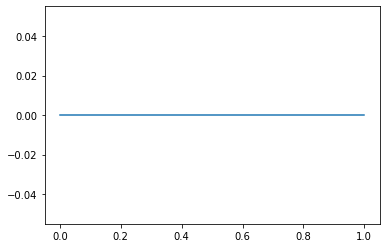

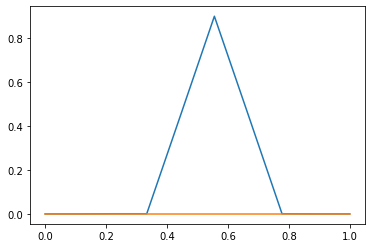

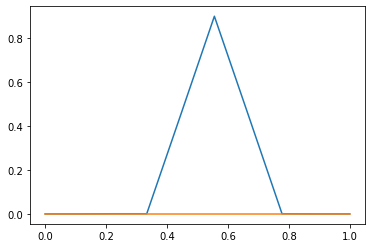

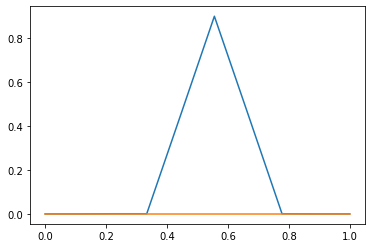

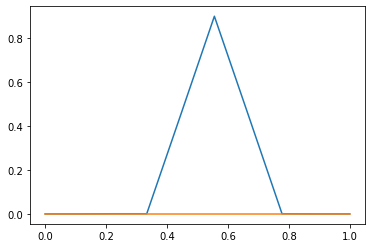

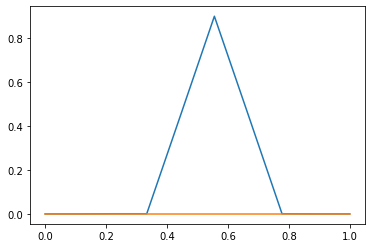

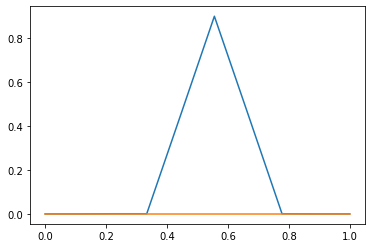

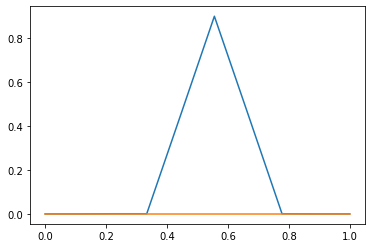

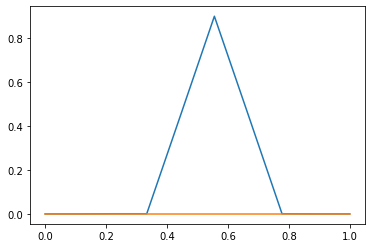

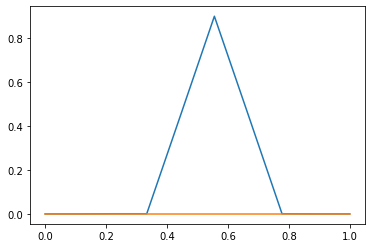

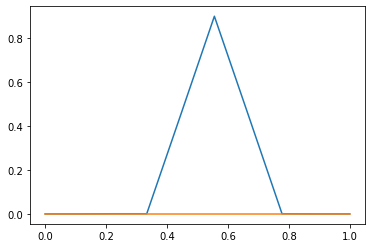

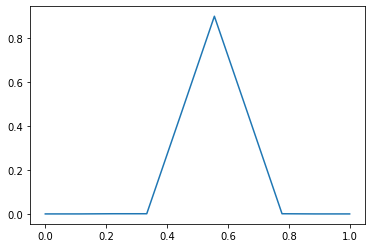

0

In [213]:
Ne = 10
q_alpha = np.array([0])
n_alpha_Update = np.zeros((10,1))
n_alpha_Current = np.zeros((10,1))
n_alpha_Current[5] = 1
n_alpha_Current[4] = 0.5
n_alpha_Current[6] = 0.5
n_alpha_Past = np.zeros((10,1))
n_alpha_Past[5] = 0.9
n_alpha_Past[4] = 0.45
n_alpha_Past[6] = 0.45
mu_bar_alpha = np.zeros((10,1)) + 1e-1
D_alpha = 0.1e-3 * np.ones((10,1))

simulation_1D(0.1, 1, Ne, T, plotting = True)



In [ ]:
buf = np.array([[1, 2], [3, 4], [5, 6]])
suf = np.array([0, 1])

omg = np.array([0.1, 0.2, 0.3])

print(buf)
print('\n')
print(buf * suf)
print('\n')
print((suf * buf)[:,0] + omg)
print('\n')

print(buf[:,0])
print(np.shape(buf)[1])

In [ ]:
rhovec = a**2 * np.ones(Ne)
phi_soln = scipy.sparse.linalg.cg(Bmatrix, rhovec)[0]
La = 1
X = np.linspace(0, La, Ne)

plt.plot(X, phi_soln)



In [ ]:
for i in range(len(B_x)):
    
    for alpha in range(len(species_list)):
        
        # mu Update
        mu_alpha_mat[i][alpha] = mu_BAR_alpha_mat[i][alpha] + charge_list[alpha] * phi[i]
        
        # v Update
        v_alpha_mat[i][alpha] = (1/a) * D_alpha_mat[i][alpha]

        #"""

In [ ]:
 ###################
    # Solving for Phi #  ===>  Will be replaced by the 2D & 3D frameworks later
    ###################
    
    phi = np.insert(phi, 0, 0)        # add 2 front ghost cell
    phi = np.insert(phi, 0, 0)
    phi = np.insert(phi, len(phi), 0) # add 2 back ghost cell
    phi = np.insert(phi, len(phi), 0)
    
    rho = np.insert(rho, 0, 0)
    rho = np.insert(rho, 0, 0)
    rho = np.insert(rho, len(rho), 0)
    rho = np.insert(rho, len(rho), 0)
    
    # Update phi vector
    phi[i + 2] = 2 * phi[i + 1] - phi[i] - (a**2 * np.exp(1)**2) * rho[i + 1] / (2 * eps_0 * eps_r)
    
    phi = phi[2:-2] # remove ghost cells
    rho = rho[2:-2] 
    

In [ ]:
trial = np.array([[1,2,3],[4,5,6],[7, 8, 9]])

trial[:,0]

In [ ]:
trial[0][1]

In [ ]:
np.pad(trial, [1, 1], mode='constant')

In [ ]:
print(type(J_1))
print(type(J_2))
print(type(rho[0]))
print(type(phi[0]))
print(type(n_alpha_mat_Update[0][0]))
print(type(n_alpha_mat_Current[0][0]))
print(type(n_alpha_mat_Past[0][0]))
print(type(J_alpha_mat[0][0]))
print(type(D_alpha_mat[0][0]))
print(type(mu_alpha_mat[0][0]))
print(type(mu_BAR_alpha_mat[0][0]))
print(type(v_alpha_mat[0][0]))



In [ ]:
arr = [1, 2, 3]

arr = np.insert(arr, 0, 0)
arr = np.insert(arr, len(arr), 0)
print(arr)

arr = arr[1:-1]
print(arr)

print(arr[2])
print(arr[-1])

In [ ]:
np.exp(1)

In [ ]:
plt.plot(B_x, n_alpha_mat_Update[:, 0])

In [ ]:
species_list = ['Mg', 'e-'] # dummy list
charge_list = [2, -1]       # dummy list


Na = 9 # length of 1D "grids"

a = 1/(Na + 1) # the distance in between grid points, delta x



# Create the Grids (or arrays of the x locations on the grids)
A_x = np.arange(0, Na, a)
B_x = np.arange(a/2, Na + a/2, a)



# Step 1 of the Algorithm: update the charge density
rho = np.zeros(len(A_x)) # initialize

for i in range(len(A_x)):
    
    summe = 0 # initialize the summation over all species alpha
    
    ##############################################################
    # for each species, grab q_alpha information from dictionary #
    ##############################################################
    
    rho[i] = summe
    

    
# Step 2 of the Algorithm: update E
E = np.zeros(len(A_x)) # initialize, NEED TO REMOVE LATER
eps_0 = 8.854187813e-12

for i in range(len(A_x) - 1):
    
    E[i + 1] = E[i] + (np.exp(1)**2 / eps_0) * rho[i] * a 


    
# Step 3 of the Algorithm: update phi
phi = np.zeros(len(A_x)) # initialize, NEED TO REMOVE LATER

eps_r = 1.0 # PLACEHOLDER, is eps_r(x) given???

for i in range(len(A_x) - 1):
    
    phi[i + 1] = phi[i] - a * E[i] / eps_r  



# have a counter to make for loops more efficient by combining the entire simulation under one for loop